# Breve análise dos resultados obtidos

Neste notebook, são plotados histogramas para as distribuições de média ponderada de asserções para os projetos coletados.

In [1]:
collected_projects_dir = '/home/gabriel/Personal/Study/2021.1/TG/collected-projects'

In [2]:
projects_pattern = f'{collected_projects_dir}/*/'

dirnames = !echo $projects_pattern

dirnames = dirnames[0].split(' ')
dirnames = [dirname[:-1] for dirname in dirnames] # Removendo barra restante de cada nome de diretório

[dirname.split('/')[-1] for dirname in dirnames]

['ARouter',
 'Android-CleanArchitecture',
 'Android-ObservableScrollView',
 'AndroidAutoSize',
 'AndroidUtilCode',
 'Auto.js',
 'BaseRecyclerViewAdapterHelper',
 'Detox',
 'DoraemonKit',
 'ExoPlayer',
 'FileDownloader',
 'GSYVideoPlayer',
 'ImmersionBar',
 'MMKV',
 'MPAndroidChart',
 'MVPArms',
 'MaterialDesignLibrary',
 'Matisse',
 'NewPipe',
 'PermissionsDispatcher',
 'PictureSelector',
 'QMUI_Android',
 'SmartRefreshLayout',
 'VirtualXposed',
 'androidannotations',
 'cocos2d-x',
 'easypermissions',
 'fastlane',
 'flutter',
 'glide',
 'ijkplayer',
 'joplin',
 'libgdx',
 'logger',
 'material-components-android',
 'matrix',
 'mediapipe',
 'realm-java',
 'scrcpy',
 'termux-app',
 'uCrop',
 'vlayout',
 'wcdb',
 'weex',
 'xbmc',
 'zxing']

In [3]:
len(dirnames)

46

In [4]:
text_results_files = [f'{dirname}.txt' for dirname in dirnames]

In [5]:
# As únicas coleções de linhas consideráveis são aquelas para as quais não houve erros
# e que não ouve resultados NaN, que indicam uma quantidade zero de arquivos Activity.java.
# Enquanto há restrições na busca para que projetos sem arquivos Activity.java sejam selecionados,
# ainda é possível que essa situação ocorra pela presença de arquivos cujos nomes apresentem a
# mesma sequências de letras, como quaisquer que obedeçam a expressão regular
# .*A.*c.*t.*i.*v.*i.*t.*.y.*\..*j.*a.*v.*a.*
def is_elligible(lines):
    prohibited_elements = [
        '!! ERROR !!',
        'NaN'
    ]
    
    return not any(any(elem in line for elem in prohibited_elements) for line in lines)

def lines_from_filename(filename):
    with open(filename, 'r') as f:
        return f.readlines()

In [6]:
line_lists = map(lines_from_filename, text_results_files)

filenames_and_lines = zip(text_results_files, line_lists)

elligible_ones = [p for p in filenames_and_lines if is_elligible(p[1])]

elligible_line_lists = [lines for filename, lines in elligible_ones]

elligible_text_results_files = [filename for filename, lines in elligible_ones]

result_strings = [lines[-1] for lines in elligible_line_lists]
verdict_strings = [lines[0] for lines in elligible_line_lists]

In [7]:
pattern_names = { 'MVC', 'MVP', 'MVVM', 'MVI' }

In [8]:
import re

In [9]:
def check_pattern_name(pattern_name):
    if pattern_name not in pattern_names:
        raise Exception(f'Error: given pattern, "{pattern_name}", is not one of "MVC", "MVP", "MVVM", or "MVI"')

def verdict_for_pattern_name(pattern_name, text):
    check_pattern_name(pattern_name)
    
    return pattern_name in text

def value_for_pattern_name(pattern_name, text):
    check_pattern_name(pattern_name)
    
    match = re.search(f'{pattern_name}' r': (\d*.\d*)', text)
    
    return float(match.group(1))

In [10]:
results_per_pattern = {
    pattern_name : [value_for_pattern_name(pattern_name, result_string) for result_string in result_strings]
    for pattern_name
    in pattern_names
}

In [11]:
verdicts_per_pattern = {
    pattern_name : [verdict_for_pattern_name(pattern_name, verdict_string) for verdict_string in verdict_strings]
    for pattern_name
    in pattern_names
}

In [12]:
!pip install pandas

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [13]:
import pandas as pd

In [14]:
ordered_pattern_names = ['MVC', 'MVP', 'MVVM', 'MVI']

result_lists = [results_per_pattern[pattern_name] for pattern_name in ordered_pattern_names]
verdict_lists = [verdicts_per_pattern[pattern_name] for pattern_name in ordered_pattern_names]

result_table_transposed = [elligible_text_results_files, *result_lists, *verdict_lists]

result_table = list(zip(*result_table_transposed))

In [15]:
result_table[:3]

[('/home/gabriel/Personal/Study/2021.1/TG/collected-projects/ARouter.txt',
  0.0,
  0.6333333333333333,
  0.0,
  0.0,
  False,
  True,
  False,
  False),
 ('/home/gabriel/Personal/Study/2021.1/TG/collected-projects/Android-CleanArchitecture.txt',
  0.0,
  0.782608695652174,
  0.0,
  0.0,
  False,
  True,
  False,
  False),
 ('/home/gabriel/Personal/Study/2021.1/TG/collected-projects/Android-ObservableScrollView.txt',
  0.0,
  0.8035714285714286,
  0.0,
  0.0,
  False,
  True,
  False,
  False)]

In [16]:
result_df = pd.DataFrame(result_table, columns = [
    'filename',
    'MVC',
    'MVP',
    'MVVM',
    'MVI',
    'MVC_VERDICT',
    'MVP_VERDICT',
    'MVVM_VERDICT',
    'MVI_VERDICT'
])

result_df.head()

,filename,MVC,MVP,MVVM,MVI,MVC_VERDICT,MVP_VERDICT,MVVM_VERDICT,MVI_VERDICT
0,/home/gabriel/Personal/Study/2021.1/TG/collect...,0.0,0.633333,0.0,0.0,False,True,False,False
1,/home/gabriel/Personal/Study/2021.1/TG/collect...,0.0,0.782609,0.0,0.0,False,True,False,False
2,/home/gabriel/Personal/Study/2021.1/TG/collect...,0.0,0.803571,0.0,0.0,False,True,False,False
3,/home/gabriel/Personal/Study/2021.1/TG/collect...,0.0,0.500000,0.0,0.0,False,False,False,False
4,/home/gabriel/Personal/Study/2021.1/TG/collect...,0.0,0.885714,0.0,0.0,False,True,False,False


In [17]:
result_df['name'] = result_df['filename'].apply(lambda filename: re.search(r'([^/]+)\.txt$', filename).group(1))

result_df[['name', 'filename']].head()

,name,filename
0,ARouter,/home/gabriel/Personal/Study/2021.1/TG/collect...
1,Android-CleanArchitecture,/home/gabriel/Personal/Study/2021.1/TG/collect...
2,Android-ObservableScrollView,/home/gabriel/Personal/Study/2021.1/TG/collect...
3,AndroidAutoSize,/home/gabriel/Personal/Study/2021.1/TG/collect...
4,AndroidUtilCode,/home/gabriel/Personal/Study/2021.1/TG/collect...


## Histogramas

Aqui, plotar-se-ão histogramas dos valores limite para cada padrão arquitetural.

Antes disso, exibe-se a quantidade de projetos para cada veredito para cada padrão arquitetural.

In [18]:
def verdict_count_for_pattern_name(pattern_name):
    return result_df[[f'{pattern_name}_VERDICT', 'name']].groupby(f'{pattern_name}_VERDICT').count()

verdict_count_for_pattern_name('MVC')

,name
MVC_VERDICT,
False,41


In [19]:
verdict_count_for_pattern_name('MVP')

,name
MVP_VERDICT,
False,6
True,35


In [20]:
verdict_count_for_pattern_name('MVVM')

,name
MVVM_VERDICT,
False,41


In [21]:
verdict_count_for_pattern_name('MVI')

,name
MVI_VERDICT,
False,37
True,4


De acordo com a revisão dos _outputs_ de _debugging_ do detector de padrões, MVP é apresentado muito frequentemente, MVI somente duas vezes, enquanto os outros em nenhum dos projetos estudados. Há, também, projetos sem padrão definido.

In [22]:
result_df[
    ~result_df['MVC_VERDICT'] &
    ~result_df['MVP_VERDICT'] &
    ~result_df['MVVM_VERDICT'] &
    ~result_df['MVI_VERDICT']
][['MVC', 'MVP', 'MVVM', 'MVI', 'name']]

,MVC,MVP,MVVM,MVI,name
3,0.0,0.500000,0.0,0.0,AndroidAutoSize
23,0.0,0.344538,0.0,0.0,androidannotations
27,0.0,0.592593,0.0,0.0,flutter
29,0.0,0.000000,0.0,0.0,joplin
30,0.0,0.500000,0.0,0.0,logger
39,0.0,0.666667,0.0,0.0,xbmc


E estes são os histogramas:

In [23]:
!pip install matplotlib

Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.


In [24]:
def histogram_for_pattern_and_verdict(df, pattern_name, verdict = True):
    threshold_column_name = pattern_name
    verdict_column_name = f'{pattern_name}_VERDICT'
    
    return df[df[verdict_column_name] == verdict][threshold_column_name].hist()

histogram_for_pattern_and_verdict(result_df, 'MVC', verdict = False).plot()

[]

Não houve nenhum projeto julgado como MVC, sendo que a maioria deles não apresenta grande valores de limite de veredito. Há um entre eles, porém, que apresenta um valor acima de 0.5. Segue o que indica o _output_ do arquivo de _debug_ do detector de padrões.

In [25]:
def name_and_pattern_ordered_by_threshold(df, pattern_name, verdict = False):
    return df[df[f'{pattern_name}_VERDICT'] == verdict][['name', pattern_name]].sort_values(by = pattern_name, ascending = False)

name_and_pattern_ordered_by_threshold(result_df, 'MVC').head()

,name,MVC
20,QMUI_Android,0.550000
25,easypermissions,0.285714
10,FileDownloader,0.222222
18,NewPipe,0.090909
31,material-components-android,0.046512


In [26]:
!cat /home/gabriel/Personal/Study/2021.1/TG/collected-projects/QMUI_Android.txt

MVP
MVC: MVC Trio prefixes are []
MVC: Controller file count is 4
MVC: Found controller types are [HomeLabController, HomeUtilController, HomeComponentsController, HomeController]
MVC: Controller type mention count is 7
MVP: Callback method count for QMUIActivity.java is 9
MVP: Callback method count for QMUIFragmentActivity.java is 5
MVP: Callback method count for InnerBaseActivity.java is 7
MVP: Callback method count for BaseFragmentActivity.java is 0
MVP: Callback method count for BaseActivity.java is 2
MVP: Callback method count for TranslucentActivity.java is 4
MVP: Callback method count for ArchTestActivity.java is 3
MVP: Callback method count for TestArchInViewPagerActivity.java is 1
MVP: Callback method count for QDMainActivity.java is 14
MVP: Total callback method count is 45
MVP: Presenter file count is 0
MVP: Found presenter types are []
MVP: Presenter class mention count is 0
MVVM: Data binding count is 0
MVVM: ViewModel file count is 0
MVVM: Found ViewModel types are [QMUIF

Pode-se ver que há tipos Controller, bem como algumas menções a eles. Porém, há também um arquivo ViewModel, o que pode mostrar um nível não tão grande de comprometimento com determinado padrão arquitetural. Sendo assim, dado um número mais relevante de métodos callback, a escolha de MVP como veredito final parece fazer mais sentido.

[]

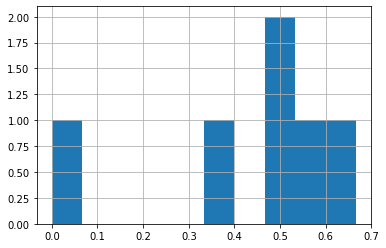

In [27]:
histogram_for_pattern_and_verdict(result_df, 'MVP', verdict = False).plot()

Enquanto, para os que tiveram a classificação de MVP rejeitada, a distribuição tende a valores maiores do que os de MVC, a verdade é que os valores limites não são grandezas comparáveis, devido a utilizarem quantificações diferentes. Para determinar-se se certo ponto de divisão é bom para se classificar projetos como pertencentes a certo padrão ou não, deve-se comparar os valores obtidos, para ele, isoladamente.

Segue o histograma dos classificados positivamente como MVP:

[]

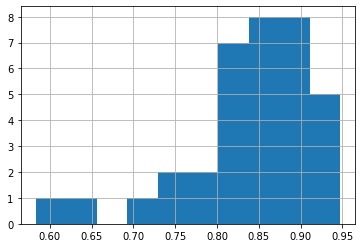

In [28]:
histogram_for_pattern_and_verdict(result_df, 'MVP', verdict = True).plot()

Enquanto, de fato, há alguns que sejam compatíveis com MVP, e que tenham valor limite abaixo de 0.7, são poucos. Pode-se afirmar que esse valor é um bom divisor para determinar-se, tomando-se em conta exclusivamente o resultado numérico, se um projeto utiliza MVP ou não.

Em seguida, exibe-se o histograma dos valores para MVVM:

[]

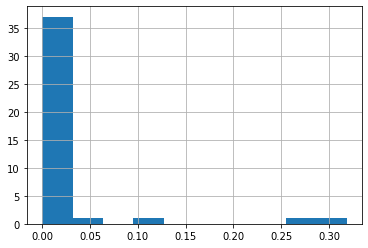

In [29]:
histogram_for_pattern_and_verdict(result_df, 'MVVM', verdict = False).plot()

In [30]:
name_and_pattern_ordered_by_threshold(result_df, 'MVVM', verdict = False).head()

,name,MVVM
34,realm-java,0.318182
37,wcdb,0.285714
20,QMUI_Android,0.100000
6,BaseRecyclerViewAdapterHelper,0.047619
30,logger,0.000000


Este é o resultado demonstrado pelo detector de padrões:

In [31]:
!cat /home/gabriel/Personal/Study/2021.1/TG/collected-projects/realm-java.txt

MVP, MVI
MVC: MVC Trio prefixes are []
MVC: Controller file count is 0
MVC: Found controller types are []
MVC: Controller type mention count is 0
MVP: Callback method count for MigrationExampleActivity.java is 1
MVP: Callback method count for ExampleActivity.java is 4
MVP: Callback method count for MainActivity.java is 4
MVP: Callback method count for ReceivingActivity.java is 2
MVP: Callback method count for ThreadExampleActivity.java is 6
MVP: Callback method count for JsonExampleActivity.java is 2
MVP: Callback method count for ModulesExampleActivity.java is 1
MVP: Callback method count for IntroExampleActivity.java is 4
MVP: Callback method count for EncryptionExampleActivity.java is 2
MVP: Callback method count for ArchExampleActivity.java is 5
MVP: Callback method count for GridViewExampleActivity.java is 4
MVP: Callback method count for MainActivity.java is 2
MVP: Callback method count for AnimationActivity.java is 4
MVP: Callback method count for GotchasActivity.java is 4
MVP: 

Considera-se pequenas as quantidades de tipos ViewModel e menções a eles, além de não haver _databinding_. É mais notável o uso de métodos _callback_, o que toma-se por caracterizar um uso predominante de MVP.

Em seguida, encontra-se o histograma para o padrão MVI.

[]

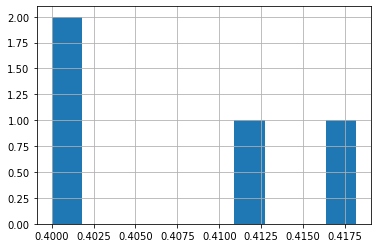

In [32]:
histogram_for_pattern_and_verdict(result_df, 'MVI', verdict = True).plot()

In [33]:
name_and_pattern_ordered_by_threshold(result_df, 'MVI', verdict = False).head()

,name,MVI
0,ARouter,0.0
22,VirtualXposed,0.0
24,cocos2d-x,0.0
25,easypermissions,0.0
26,fastlane,0.0


Todos os projetos que apresentaram indícios para MVI demonstraram, de fato, incorporar o padrão arquitetural. Esse uso foi comprovado pela leitura do código, e constatação da chamada de métodos pertencentes à biblioteca.